Se necesita la libreria de Seaborn para la visualizacion de las graficas

In [1]:
import pandas as pd
import numpy as np

In [3]:
data= pd.read_csv("C:/Users/Usuario/Documents/Programas/Tratados_internacionales_de_Colombia.csv")

In [4]:
data2= data.replace('(NO REGISTRA)',np.nan)

In [5]:
data3=data2.drop_duplicates()
data3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 0 to 67366
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Nombre del Tratado             3022 non-null   object
 1   Bilateral                      3022 non-null   object
 2   Lugar de Adopcion              3022 non-null   object
 3   Fecha de Adopcion              3022 non-null   object
 4   Estados-Organismos             3022 non-null   object
 5   Temas                          1 non-null      object
 6   Naturaleza del Tratado         3022 non-null   object
 7   Depositario                    804 non-null    object
 8   Suscribio Por Colombia         2279 non-null   object
 9   Vigente                        3022 non-null   object
 10  Fecha Ley Aprobatoria          1029 non-null   object
 11  Numero Ley Aprobatoria         1062 non-null   object
 12  Sentencia Fecha Ley            2331 non-null   object
 13  Se

Durante un primer vistazo de los datos se noto que habia muchos datos repetidos y a su vez habia tambien habia datos faltantes, se procedio a categorizar estos datos que no registran como datos nulos y eliminar los datos repetidos, de igual manera se procedio a categorizar los datos de fechas a su correspondiente categoria para poder trabajar con un dataset limpio

In [6]:
data3['Fecha Ley Aprobatoria']=pd.to_datetime(data3['Fecha Ley Aprobatoria'],format='%d/%m/%Y')


C:\Users\Usuario\AppData\Local\Temp/ipykernel_14696/101609770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Fecha Ley Aprobatoria']=pd.to_datetime(data3['Fecha Ley Aprobatoria'],format='%d/%m/%Y')


In [7]:
data3['Fecha de Adopcion']=pd.to_datetime(data3['Fecha de Adopcion'],format='%d/%m/%Y',errors='coerce')

C:\Users\Usuario\AppData\Local\Temp/ipykernel_14696/144531257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Fecha de Adopcion']=pd.to_datetime(data3['Fecha de Adopcion'],format='%d/%m/%Y',errors='coerce')


In [8]:
Datos=data3[['Estados-Organismos','Depositario','Fecha Ley Aprobatoria','Vigente','Bilateral','Fecha de Adopcion']]

In [9]:
Datos['Anio_Aprobacion']=Datos['Fecha Ley Aprobatoria'].dt.year

C:\Users\Usuario\AppData\Local\Temp/ipykernel_14696/739792055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos['Anio_Aprobacion']=Datos['Fecha Ley Aprobatoria'].dt.year


In [10]:
Datos['Anio_Adopcion']=Datos['Fecha de Adopcion'].dt.year

C:\Users\Usuario\AppData\Local\Temp/ipykernel_14696/3075716918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos['Anio_Adopcion']=Datos['Fecha de Adopcion'].dt.year


In [11]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 0 to 67366
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Estados-Organismos     3022 non-null   object        
 1   Depositario            804 non-null    object        
 2   Fecha Ley Aprobatoria  1029 non-null   datetime64[ns]
 3   Vigente                3022 non-null   object        
 4   Bilateral              3022 non-null   object        
 5   Fecha de Adopcion      3020 non-null   datetime64[ns]
 6   Anio_Aprobacion        1029 non-null   float64       
 7   Anio_Adopcion          3020 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 212.5+ KB


In [12]:
Datos.head()

,Estados-Organismos,Depositario,Fecha Ley Aprobatoria,Vigente,Bilateral,Fecha de Adopcion,Anio_Aprobacion,Anio_Adopcion
0,ORGANIZACIÓN DE ESTADOS AMERICANOS-OEA,ORGANIZACIÓN DE ESTADOS AMERICANOS-OEA,1931-05-27,SI,NO,1928-02-20,1931.0,1928.0
1,SUECIA,NaN,1928-10-09,SI,SI,1928-03-09,1928.0,1928.0
2,INSTITUTO LATINOAMERICANO DE LAS NACIONES UNID...,NaN,1989-10-04,SI,SI,1988-06-07,1989.0,1988.0
3,ALEMANIA,NaN,NaT,SI,SI,1991-11-01,NaN,1991.0
4,ORGANIZACIÓN PARA LA COOEPRACION Y EL DESARROL...,NaN,NaT,NO,NO,2017-06-07,NaN,2017.0


In [13]:
prueba1= Datos.groupby(['Vigente','Anio_Adopcion'],as_index=True).agg({'Bilateral':'count'})
prueba1=prueba1.reset_index()
prueba1.info()
prueba1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Vigente        241 non-null    object 
 1   Anio_Adopcion  241 non-null    float64
 2   Bilateral      241 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB


,Vigente,Anio_Adopcion,Bilateral
0,NO,1825.0,1
1,NO,1847.0,1
2,NO,1864.0,1
3,NO,1866.0,1
4,NO,1870.0,1
...,...,...,...
236,SI,2016.0,21
237,SI,2017.0,12
238,SI,2018.0,20
239,SI,2019.0,11


In [14]:
prueba2= pd.pivot_table(data=Datos,index='Estados-Organismos',aggfunc='count')
prueba2=prueba2.reset_index()
prueba2=prueba2.rename(columns={'Vigente':'Acuerdos'})
prueba2[['Estados-Organismos','Acuerdos']]


,Estados-Organismos,Acuerdos
0,ACCION DE SISTEMAS INFORMATIVOS NACIONALES-ASIN,9
1,ACUERDO EUROPEO DE LIBRE COMERCIO -AELC,4
2,ACUERDO EUROPEO DE LIBRE COMERCIO -AELCNORUEGA,1
3,AGENCIA INTERNACIONAL DE ENERGIAS RENOVABLES-I...,1
4,ALEMANIA,161
...,...,...
274,VENEZUELABRASILECUADORPERU,1
275,VENEZUELAECUADOR,1
276,VENEZUELAMEXICO,1
277,VIETNAM,1


In [15]:
prueba4= pd.pivot_table(data=Datos,index=['Vigente'],aggfunc='count')
prueba4=prueba4.reset_index()
prueba4
prueba4[['Estados-Organismos','Vigente']]

,Estados-Organismos,Vigente
0,885,NO
1,2137,SI


In [16]:
prueba5= pd.pivot_table(data=Datos,index=['Anio_Aprobacion','Anio_Adopcion'],aggfunc='count')
prueba5=prueba5.reset_index()
prueba5=prueba5.rename(columns={'Bilateral':'Total'})
prueba5[['Anio_Aprobacion','Anio_Adopcion','Total']]

,Anio_Aprobacion,Anio_Adopcion,Total
0,1881.0,1880.0,2
1,1881.0,1881.0,1
2,1882.0,1881.0,1
3,1886.0,1885.0,1
4,1886.0,1886.0,1
...,...,...,...
534,2018.0,2016.0,6
535,2019.0,1960.0,1
536,2019.0,2012.0,2
537,2019.0,2016.0,1


In [17]:
prueba8= Datos.groupby(['Anio_Adopcion'],as_index=True).agg({'Vigente':'count'})
prueba8=prueba8.reset_index()
prueba8.info()
prueba8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Anio_Adopcion  142 non-null    float64
 1   Vigente        142 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


,Anio_Adopcion,Vigente
0,1823.0,2
1,1825.0,1
2,1829.0,1
3,1846.0,1
4,1847.0,2
...,...,...
137,2016.0,42
138,2017.0,30
139,2018.0,34
140,2019.0,32


In [19]:
## import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


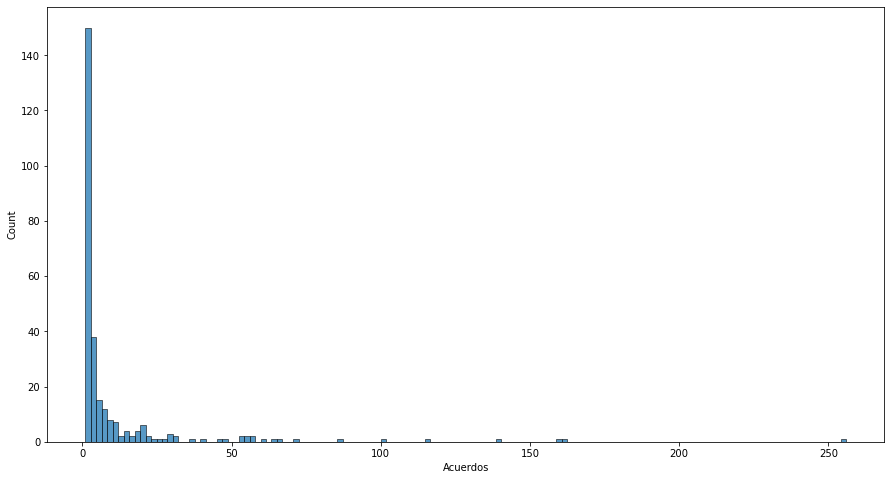

In [20]:
plt.figure(figsize=(15,8))
g=sns.histplot(data=prueba2,x='Acuerdos')

In [21]:
prueba3=prueba2[prueba2['Acuerdos']>50]
prueba3[['Estados-Organismos','Acuerdos']]

,Estados-Organismos,Acuerdos
4,ALEMANIA,161
39,BRASIL,139
53,CHILE,57
78,COMUNIDAD EUROPEA,60
98,ECUADOR,101
111,ESPAÑA,55
112,ESTADOS UNIDOS DE AMERICA,256
149,ITALIA,53
151,JAPON,65
189,ORGANIZACIÓN DE ESTADOS AMERICANOS-OEA,115


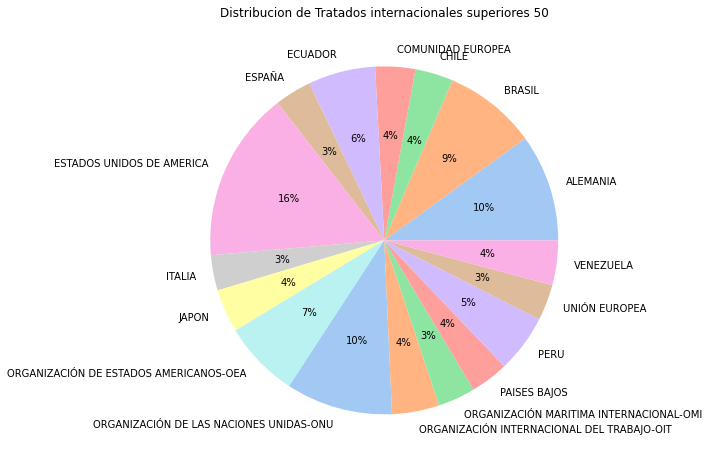

In [22]:

plt.figure(figsize=(15,8))
palette_color = sns.color_palette('pastel')
plt.pie(prueba3['Acuerdos'],labels=prueba3['Estados-Organismos'] ,colors=palette_color,
         autopct='%.0f%%')
plt.title('Distribucion de Tratados internacionales superiores 50')

plt.show()

-> Colombia hace Acuerdos con grandes potencias, organizaciones internacionales y paises vecinos principalmente

   Estados-Organismos Vigente
0                 885      NO
1                2137      SI


<Figure size 432x288 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

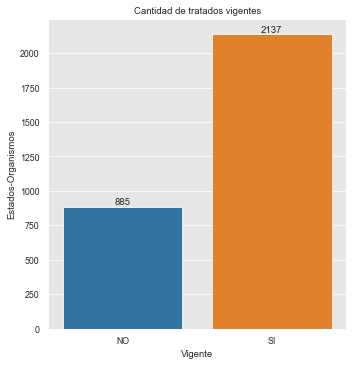

In [23]:
print(prueba4[['Estados-Organismos','Vigente']])
sns.despine(left=True)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
g=sns.catplot(data=prueba4,x='Vigente',y='Estados-Organismos',kind='bar',ci=None)
#g.set_xticklabels(rotation=90) 
ax = g.facet_axis(0, 0)
    
    # add annotations
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
#g.set(xlabel='Tipo de instituion academica ', ylabel='Numero de estudiantes ')
plt.title('Cantidad de tratados vigentes')
plt.show()

Text(0.5, 1.0, 'Cantidad de tratados por año')

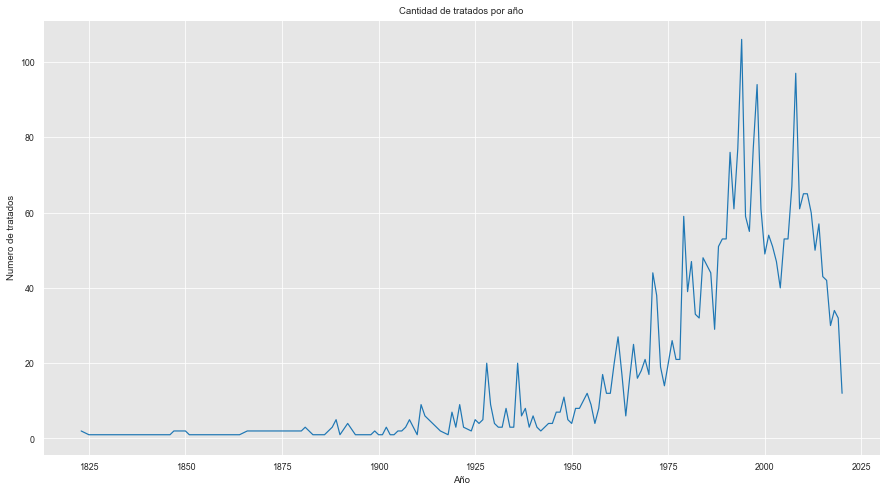

In [24]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
g= sns.lineplot(data=prueba8,x='Anio_Adopcion',y='Vigente',ci=None)
g.set(xlabel='Año',ylabel='Numero de tratados')
plt.title('Cantidad de tratados por año')

-> en los años 90 surge un pico en los acuerdos adoptados debido a la apertura economica que tuvo colombia y la correspondiente caida de estos en años posteriores

Text(0.5, 1.0, 'Cantidad de tratados vigentes y no vigentes por año')

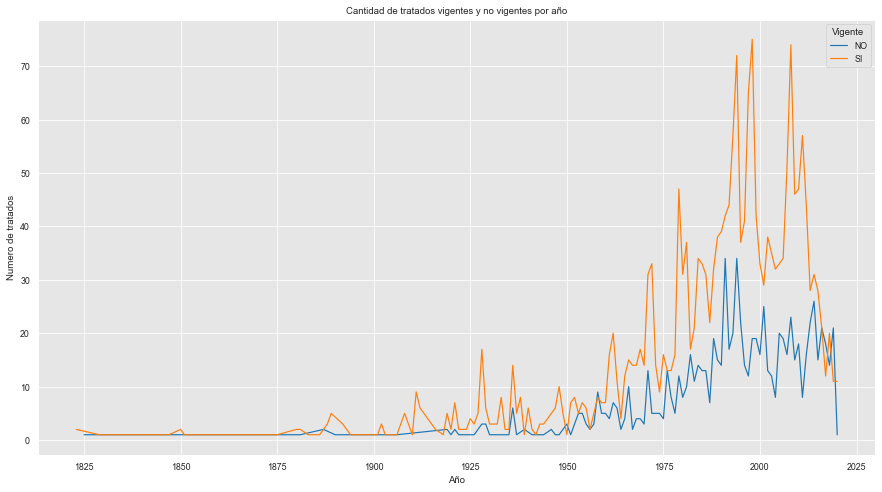

In [25]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
g= sns.lineplot(data=prueba1,x='Anio_Adopcion',y='Bilateral',ci=None,hue='Vigente')
g.set(xlabel='Año',ylabel='Numero de tratados')
plt.title('Cantidad de tratados vigentes y no vigentes por año')

->Colombia tiene mantiene una balanza positiva en cuanto a la retencion de acuerdos

In [26]:
prueba6=Datos

In [27]:
prueba6['diferencia']=prueba6['Anio_Aprobacion']-prueba6['Anio_Adopcion']

C:\Users\Usuario\AppData\Local\Temp/ipykernel_14696/1684386084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba6['diferencia']=prueba6['Anio_Aprobacion']-prueba6['Anio_Adopcion']


In [28]:
prueba6['diferencia']=prueba6['diferencia'].fillna(0)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_14696/1082413340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba6['diferencia']=prueba6['diferencia'].fillna(0)


In [29]:
prueba6[['Anio_Aprobacion','Anio_Adopcion','diferencia']]

,Anio_Aprobacion,Anio_Adopcion,diferencia
0,1931.0,1928.0,3.0
1,1928.0,1928.0,0.0
2,1989.0,1988.0,1.0
3,NaN,1991.0,0.0
4,NaN,2017.0,0.0
...,...,...,...
58073,NaN,2020.0,0.0
64506,NaN,2019.0,0.0
65016,NaN,2018.0,0.0
65053,NaN,2017.0,0.0


In [30]:
prueba6['diferencia'].value_counts()
promedios=prueba6

In [67]:
p=promedios[promedios['diferencia']>0]


In [68]:
promedio=p[p['diferencia']<50]

->Se noto que hay datos con diferencias de aprobacion mucho mayores a sus fechas de adopcion y surge la pregunta, por que hay acuerdos que se demoran tanto en aprobarse, seria bueno un analisis de un experto sobre el tema.

In [32]:
prueba6[prueba6['diferencia']>100]

,Estados-Organismos,Depositario,Fecha Ley Aprobatoria,Vigente,Bilateral,Fecha de Adopcion,Anio_Aprobacion,Anio_Adopcion,diferencia
114,ARGENTINABOLIVIABRASILCHILEPARAGUAYPERUURUGUAY,URUGUAY,1992-12-30,SI,NO,1889-02-12,1992.0,1889.0,103.0
277,OFICINA INTERNACIONAL DE PESAS Y MEDIDAS-BIPM,FRANCIA,2012-02-06,NO,NO,1875-05-20,2012.0,1875.0,137.0
693,ORGANIZACIÓN MUNDIAL DE LA PROPIEDAD INTELECTU...,SUECIA,1995-08-30,SI,NO,1883-03-20,1995.0,1883.0,112.0
1635,ORGANIZACIÓN DE ESTADOS AMERICANOS-OEA,URUGUAY,1992-12-30,SI,NO,1889-02-12,1992.0,1889.0,103.0


-> este ejemplo concreto muestra que hay fechas de aprobacion que estan erroneas, pues este acuerdo fue aprobado en el 2001

In [33]:
prueba6[prueba6['diferencia']==-28.0]

,Estados-Organismos,Depositario,Fecha Ley Aprobatoria,Vigente,Bilateral,Fecha de Adopcion,Anio_Aprobacion,Anio_Adopcion,diferencia
1250,ORGANIZACIÓN DE AVIACION CIVIL INTERNACIONAL-OACI,ORGANIZACIÓN DE AVIACION CIVIL INTERNACIONAL-OACI,1971-11-21,SI,NO,1999-05-28,1971.0,1999.0,-28.0


Text(0.5, 1.0, 'Distribucion de la diferencia entre la aprobacion y la adopcion de los tratados')

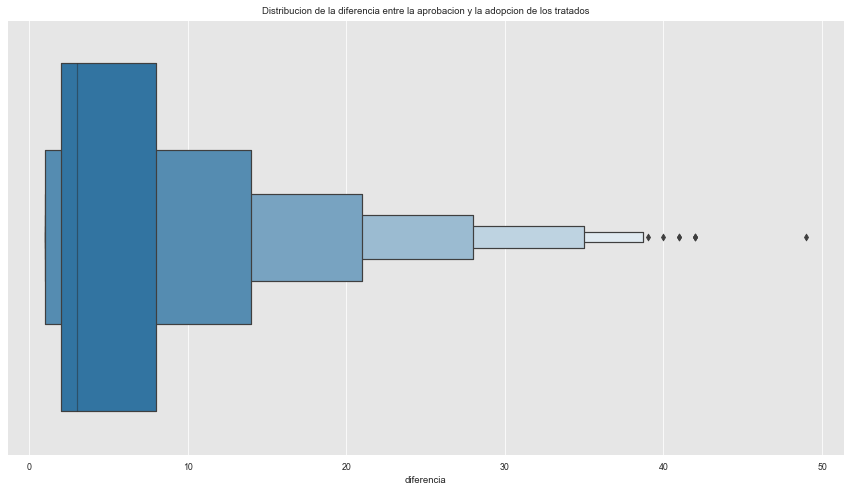

In [73]:
plt.figure(figsize=(15,8))
sns.boxenplot(x=promedio['diferencia'])
plt.title('Distribucion de la diferencia entre la aprobacion y la adopcion de los tratados')

In [35]:
corr= round(Datos.corr(),3)
corr.style.background_gradient()

,Anio_Aprobacion,Anio_Adopcion,diferencia
Anio_Aprobacion,1.000000,0.916000,0.142000
Anio_Adopcion,0.916000,1.000000,-0.273000
diferencia,0.142000,-0.273000,1.000000


In [72]:
print('Media',promedio['diferencia'].mean())
print('Moda',promedio['diferencia'].mode())
print('Desviacion estandar', promedio['diferencia'].std())

Media 6.469017094017094
Moda 0    2.0
dtype: float64
Desviacion estandar 7.721011092784072


-> Durante el analisis estadistico es visible ver la demora en la aprobacion de los acuerdos ya sea debido a burocracia, se puede notar el promedio de aprobacion de los acuerdos es de casi 6 años pero se nota que lo mas normal es que se aprueben en 2 con una desviacion estandar elevada debido a datos extremos, .